<a href="https://colab.research.google.com/github/PiyawatFrom/practices/blob/main/Week3_Q1_Bi_gram_from_name_and_surname.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bi-gram from Name and Surname**

*   จากไฟล์รายชื่อ week02_workshop.xlsx
*   ต่อเนื่องจาก Question 02 Week 02
*   ให้วิเคราะห์หา ตัวอักษรทั้งไทย และ อังกฤษ ที่พบบ่อยที่สุดในชื่อ
*   ให้ทําการแสดงกราฟ ของจํานวนตัวอักษรที่พบบ่อยสุด ที่ได้จากใน Question 02 week 02






In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df_classMem = pd.read_excel('gdrive/MyDrive/Data Master Class/Week 2 Tools for Data Sci/Week 2 material and code/week02/week02_workshop.xlsx')
df_classMem

ID        ชื่อ            นามสกุล
0    101.0    Amornrat          Rattanung
1    102.0     analaya           Korsakul
2    103.0        Anan          Ubolkomut
3    104.0      Anawil  Tangvongsasiriwat
4    105.0      Anuwat      Bannaraksakul
..     ...         ...                ...
125  226.0       เอมอร      สว่างจิตเมตตา
126  227.0  Pornchanok      Sukatchasakul
127  228.0       พีรศุ        วัฒนศิรางค์
128  229.0       จตุพร          นาคเปี่ยม
129  230.0     Kanokon              Janda

[130 rows x 3 columns]

In [ ]:
df_classMem.info() #ดูคุณสมบัติ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       130 non-null    float64
 1   ชื่อ     130 non-null    object 
 2   นามสกุล  130 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.2+ KB


In [ ]:
#เพื่อแสดงผลภาษาไทย
import matplotlib as mpl
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

### ตัวอักษรที่พบบ่อยในชื่อ

In [ ]:
char_freq = {} #สร้าง Dict มาช่วยนับ
for nameN in range(130) : #วนชื่อ 130 ครั้ง
    name = str(df_classMem.at[ nameN , "ชื่อ"]).lower() #เลือกชื่อในคอลัมป์ชื่อ โดยเปลี่ยนแถวไปเรื่อยๆ ตาม index
    for x in name : #นับผ่าน Dict ทีละตัวอักษร
        if x in char_freq :
            char_freq[x] += 1
        else :
            char_freq[x] = 1
high_char_freq = max(char_freq.values()) #หาค่า Value สูงสุด
print("The common character :" , end=" ")
for k in char_freq :
    if char_freq[k] == high_char_freq : #พิมพ์ key ที่ทำให้ได้ค่า Value สูงสุดออกมา
        print(k , end=" ") #แสดงค่า key โดยไม่ขึ้นบรรทัดใหม่
print()
print("Appear",high_char_freq,"times") #โผล่มากี่ครั้ง

The common character : a 
Appear 113 times


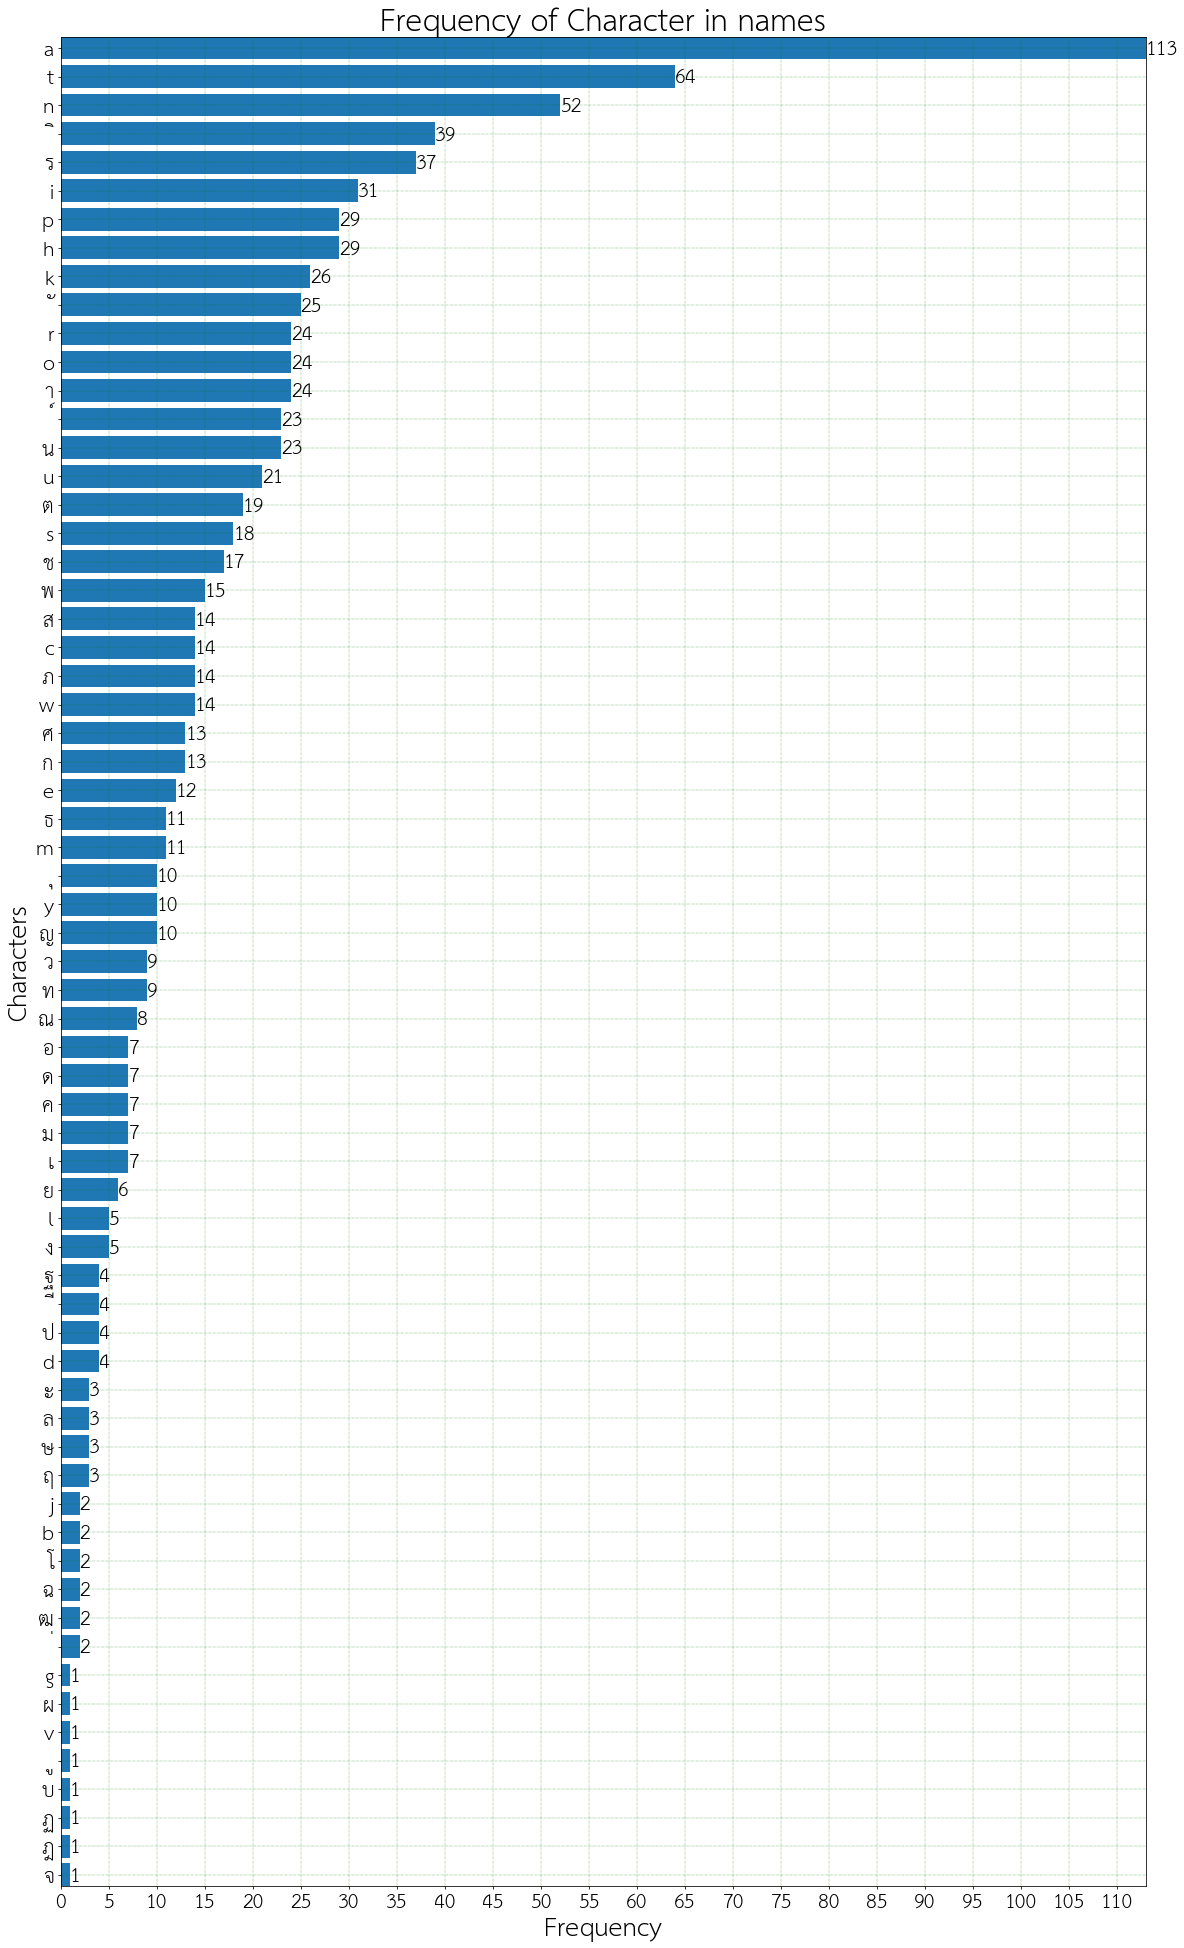

In [ ]:
df_charFreq = pd.DataFrame(list(char_freq.items())).rename(columns = {0:"charX",1:"charFreq"}).sort_values("charFreq",ascending=True) #สร้าง df จาก dict

dfx = df_charFreq["charX"]
dfy = df_charFreq["charFreq"]

plt.figure(figsize=[20,35], dpi=70)

plt.xlabel("Frequency",fontsize=25)
plt.ylabel("Characters",fontsize=25)
plt.title("Frequency of Character in names",fontsize=30)

plt.xticks(np.arange(0,115,5), fontsize=20)
plt.yticks(fontsize=20)
plt.grid(color = 'green', linestyle = ':', linewidth = 0.5)
plt.barh(dfx, dfy)

#ใส่ตัวเลขไปหน้าแถว
for index, value in enumerate(dfy):
    plt.text(value, index-0.2,str(value) ,color = 'black', fontweight = 'bold',fontsize=20)

plt.autoscale(enable=True, axis='both', tight=True)
plt.show()

### Bi-Gram ชื่อและนามสกุล

In [ ]:
Bi_char_name = [] #สร้าง list ใส่อักษรคู่ของชื่อ
Bi_char_Sname = [] #สร้าง list มาใส่อักษรคู่ของนาสกุล
for x in range(130) :
    name = str(df_classMem.at[x ,"ชื่อ"]).lower() #ปรับชื่อเป็นตัวพิมพ์เล็กด้วย
    for n in range(len(name)-1) :
        Bi_char_name.append(name[n]+name[n+1]) #ใส่คู่ตัวอักษรชื่อลง List
for y in range(130) :
    Sname = str(df_classMem.at[y ,"นามสกุล"]).lower() #ปรับนามสกุลเป็นตัวพิมพ์เล็ก
    for s in range(len(Sname)-1) :
        Bi_char_Sname.append(Sname[s]+Sname[s+1]) #ใส่คู่ตัวอักษรนามสกุลลง List
Bichar = Bi_char_name+Bi_char_Sname #รวม list เพื่อให้ได้คู่ทั้งหมด
Bi_num = {} # สร้าง Dict มาช่วยนับ
for item in Bichar :
    if item in Bi_num :
        Bi_num[item] += 1
    else :
        Bi_num[item] = 1

high_Bi_freq = max(Bi_num.values()) #หาค่า Value สูงสุด
print("The common Bi character :" , end=" ")
for z in Bi_num :
    if Bi_num[z] == high_Bi_freq : #พิมพ์ key ที่ทำให้ได้ค่า Value สูงสุดออกมา
        print(z , end=" ") #แสดงค่า key โดยไม่ขึ้นบรรทัดใหม่
print()
print("Appear",high_Bi_freq,"times") #โผล่มากี่ครั้ง

The common Bi character : an 
Appear 46 times


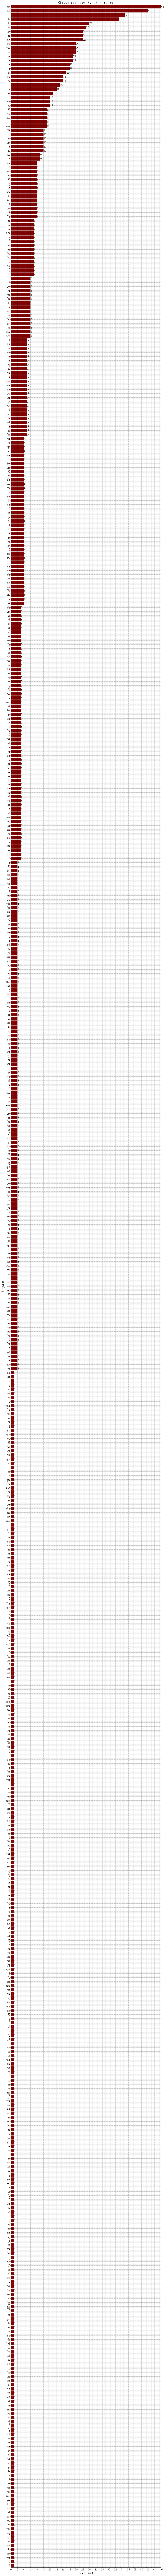

In [ ]:
df_BiGram = pd.DataFrame(list(Bi_num.items())).rename(columns = {0:"Bigram",1:"Count"}).sort_values("Count",ascending=True) #สร้าง df จาก dict

x = df_BiGram["Bigram"]
y = df_BiGram["Count"]

plt.figure(figsize=[20,350], dpi=70)

plt.xlabel("BG Count",fontsize=25)
plt.ylabel("Bi-gram",fontsize=25)
plt.title("Bi-Gram of name and surname",fontsize=30, fontweight = 'bold')

plt.xticks(np.arange(0,50,2), fontsize=20)
plt.yticks(fontsize=20)
#plt.grid(color = 'gray', linestyle = ':', linewidth = 0.5)

# Turn on the minor TICKS, which are required for the minor GRID ทำเส้นละเอียด
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-.', linewidth='0.5', color='black')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

plt.barh(x, y ,color ='maroon')

#ใส่ตัวเลขไปหน้าแถว
for index, value in enumerate(y):
    plt.text(value, index-0.2,str(value) ,color = 'black', fontweight = 'bold',fontsize=20)

plt.autoscale(enable=True, axis='both', tight=True)
plt.show()